In [1]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read the 'fraudTest.csv' file and store its contents in the 'df_test' DataFrame
df_test = pd.read_csv('fraudTest.csv')

# Read the 'fraudTrain.csv' file and store its contents in the 'df_train' DataFrame
df_train = pd.read_csv('fraudTrain.csv')

# Preprocessing

In [3]:
# Concatenate two DataFrames, 'df_train' and 'df_test', to combine their data.
# The 'ignore_index=True' parameter resets the index to create a continuous index for the new DataFrame 'df'.
df = pd.concat([df_train, df_test], ignore_index=True) #Merging both the datasets to do preprocessing, we can shuffle and split the data at later  stage

In [4]:
# Retrieve and display the shape (number of rows and columns) of the combined 'df' DataFrame.
# The result is a tuple representing the shape.
df_test.shape , df_train.shape , df.shape #verifying the record counts

((555719, 23), (1296675, 23), (1852394, 23))

In [5]:
# Remove the column named 'Unnamed: 0' from the DataFrame 'df'.
# The 'inplace=True' parameter modifies the 'df' DataFrame in place.
df.drop(columns=['Unnamed: 0'], inplace=True) # Dropping this column since pandas creates indexing by default

In [6]:
# Define a dictionary 'new_column_names' that maps old column names to new column names.
# This will be used for renaming the columns in the DataFrame.
new_column_names = {
    'trans_date_trans_time': 'transaction_snapshot',
    'cc_num': 'credit_card_number',
    'merchant': 'merchant_name',
    'amt': 'amount',
    'first': 'first_name',
    'last': 'last_name',
    'lat': 'latitude',
    'long': 'longitude',
    'city_pop': 'city_population',
    'dob': 'date_of_birth',
    'trans_num': 'transaction_number',
    'merch_lat': 'merchant_latitude',
    'merch_long': 'merchant_longitude',
}

# Rename the DataFrame columns according to the 'new_column_names' mapping.
# The 'inplace=True' parameter modifies the DataFrame 'df' in place.
df.rename(columns=new_column_names, inplace=True)


In [7]:
#Summary statistics
df.describe()

,credit_card_number,amount,zip,latitude,longitude,city_population,unix_time,merchant_latitude,merchant_longitude,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


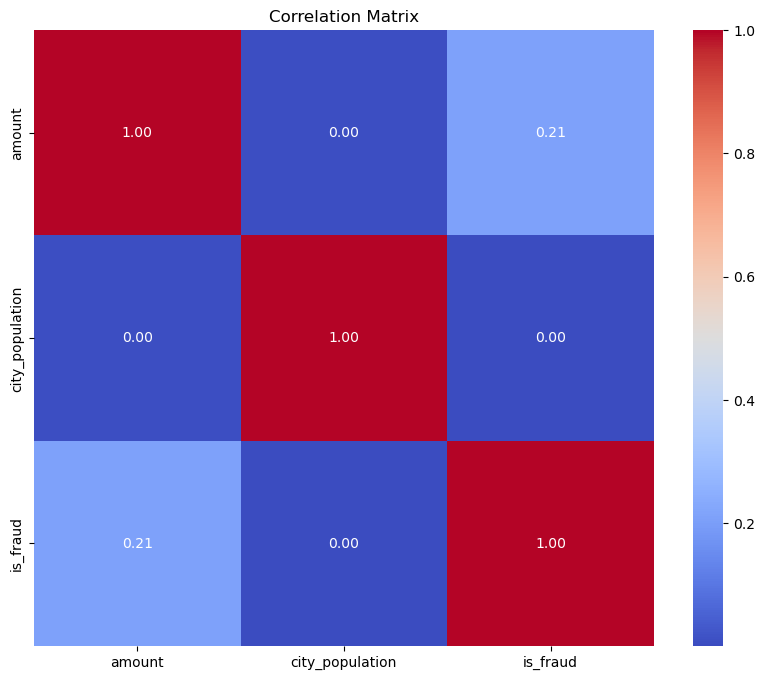

In [8]:
correlation_matrix = df[['amount','city_population','is_fraud']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Check for missing (null) values in each column of the DataFrame 'df'.
# The 'isnull()' function returns a DataFrame of the same shape as 'df' with True for missing values and False for non-missing values.

# Calculate and display the sum of missing values in each column.
# The result is a Series where each value represents the count of missing values in the corresponding column.


df.isnull().sum()  #These ensures that there are no NULL or missing values in our dataset

transaction_snapshot    0
credit_card_number      0
merchant_name           0
category                0
amount                  0
first_name              0
last_name               0
gender                  0
street                  0
city                    0
state                   0
zip                     0
latitude                0
longitude               0
city_population         0
job                     0
date_of_birth           0
transaction_number      0
unix_time               0
merchant_latitude       0
merchant_longitude      0
is_fraud                0
dtype: int64

In [10]:
#Check for duplicates
df[df.duplicated(subset=['transaction_number'], keep=False)] 
#each value in column transaction_number is unique

,transaction_snapshot,credit_card_number,merchant_name,category,amount,first_name,last_name,gender,street,city,...,latitude,longitude,city_population,job,date_of_birth,transaction_number,unix_time,merchant_latitude,merchant_longitude,is_fraud


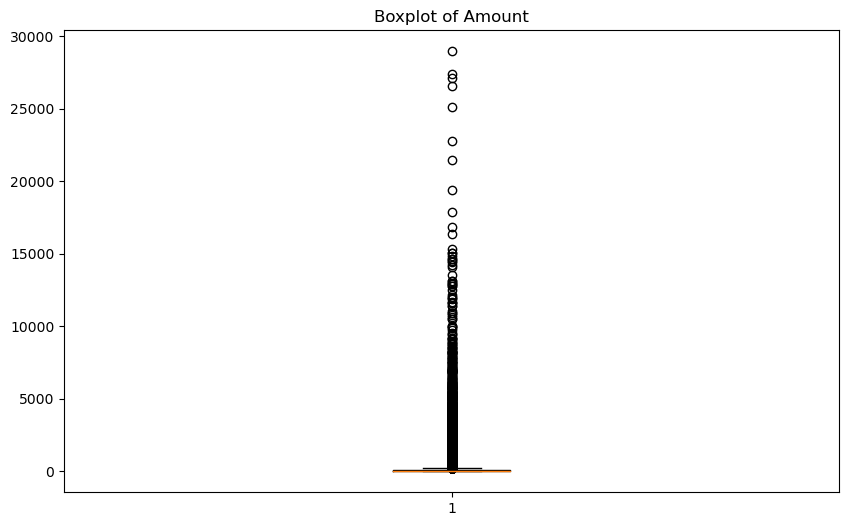

In [11]:
#Checking for outliers in amount
plt.figure(figsize=(10, 6)) 
x1 = df['amount']
plt.boxplot(x1)
plt.title('Boxplot of Amount')
plt.show()

# Feature Engineering

In [12]:
#creating new feature called age based on date_of_birth , reference age as of 2023/01/01
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
reference_date = pd.to_datetime('2023-01-01')
df['age'] = (reference_date - df['date_of_birth']).astype('<m8[Y]')
df['age'] = df['age'].astype(int)

In [13]:
# Apply one-hot encoding to the 'gender' column
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, gender_dummies], axis=1)



In [14]:
# Define a function to classify credit card numbers
def classify_credit_card(number):
    number_str = str(number)
    if number_str.startswith('3'):
        return 'American Express'
    elif number_str.startswith('4'):
        return 'Visa'
    elif number_str.startswith(('2', '5')):
        return 'Mastercard'
    elif number_str.startswith('6'):
        return 'Discover'
    else:
        return 'Other'

In [15]:
# Create a new column 'card_type' in the DataFrame 'df' to store the results of card type classification.
# This column will contain the card types assigned to each credit card number based on the 'classify_credit_card' function.

# Use the 'apply' method to apply the 'classify_credit_card' function to each credit card number in the 'credit_card_number' column.
# The results of this function will be stored in the 'card_type' column for each corresponding row.

df['card_type'] = df['credit_card_number'].apply(classify_credit_card)

In [16]:
label_encoder = LabelEncoder()
df['card_type_encoded']= label_encoder.fit_transform(df['card_type'])

In [17]:
# Display the first 5 rows of the DataFrame 'df' to provide a quick overview of its data.
df.head(5)

,transaction_snapshot,credit_card_number,merchant_name,category,amount,first_name,last_name,gender,street,city,...,transaction_number,unix_time,merchant_latitude,merchant_longitude,is_fraud,age,gender_F,gender_M,card_type,card_type_encoded
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34,1,0,Mastercard,2
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,1,0,Discover,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60,0,1,American Express,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55,0,1,American Express,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36,0,1,American Express,0


In [18]:
# Retrieve and display the column names (headers) of the DataFrame 'df'.
df.columns

Index(['transaction_snapshot', 'credit_card_number', 'merchant_name',
       'category', 'amount', 'first_name', 'last_name', 'gender', 'street',
       'city', 'state', 'zip', 'latitude', 'longitude', 'city_population',
       'job', 'date_of_birth', 'transaction_number', 'unix_time',
       'merchant_latitude', 'merchant_longitude', 'is_fraud', 'age',
       'gender_F', 'gender_M', 'card_type', 'card_type_encoded'],
      dtype='object')

In [19]:
# Select only 'amount' and 'city_pop' columns
selected_columns = ['amount', 'city_population']
X = df[selected_columns]

In [20]:
# Scale the selected features using StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [21]:
# Create a DataFrame for the standard scaled features
scaled_columns = pd.DataFrame(X_standard, columns=['standard_scaled_amount', 'standard_scaled_city_pop'])

In [22]:
# Concatenate the scaled columns with the original DataFrame
df = pd.concat([df, scaled_columns], axis=1)

In [23]:
# Apply Min-Max scaling to the selected features
scaler = MinMaxScaler()
X_min_max = scaler.fit_transform(X)

In [24]:
# Create a DataFrame for the min max scaled features
scaled_columns = pd.DataFrame(X_min_max, columns=['min_max_scaled_amount', 'min_max_scaled_city_pop'])

In [25]:
# Concatenate the scaled columns with the original DataFrame
df = pd.concat([df, scaled_columns], axis=1)

In [26]:
# Display the first 5 rows of the updated DataFrame
df.head(5)

,transaction_snapshot,credit_card_number,merchant_name,category,amount,first_name,last_name,gender,street,city,...,is_fraud,age,gender_F,gender_M,card_type,card_type_encoded,standard_scaled_amount,standard_scaled_city_pop,min_max_scaled_amount,min_max_scaled_city_pop
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,34,1,0,Mastercard,2,-0.408741,-0.282429,0.000137,0.001194
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,44,1,0,Discover,1,0.233378,-0.293527,0.003670,0.000043
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,60,0,1,American Express,0,0.942184,-0.280243,0.007569,0.001421
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,55,0,1,American Express,0,-0.157381,-0.287590,0.001520,0.000659
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,36,0,1,American Express,0,-0.176470,-0.293693,0.001415,0.000026


In [27]:
df.columns

Index(['transaction_snapshot', 'credit_card_number', 'merchant_name',
       'category', 'amount', 'first_name', 'last_name', 'gender', 'street',
       'city', 'state', 'zip', 'latitude', 'longitude', 'city_population',
       'job', 'date_of_birth', 'transaction_number', 'unix_time',
       'merchant_latitude', 'merchant_longitude', 'is_fraud', 'age',
       'gender_F', 'gender_M', 'card_type', 'card_type_encoded',
       'standard_scaled_amount', 'standard_scaled_city_pop',
       'min_max_scaled_amount', 'min_max_scaled_city_pop'],
      dtype='object')

# EDA

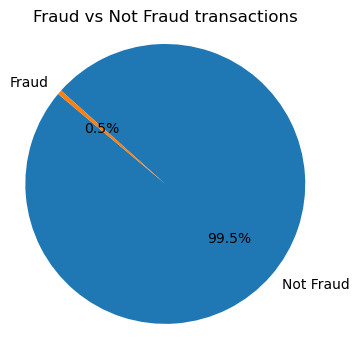

In [28]:
labels=["Not Fraud","Fraud"]
fraud_or_not = df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
plt.figure(figsize=(4, 4))  # Set the figure size (optional)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140) 
plt.axis('equal') 
plt.title('Fraud vs Not Fraud transactions')
plt.show()

In [29]:
df_fraud = df[df['is_fraud'] == 1]
df_fraud.shape

(9651, 31)

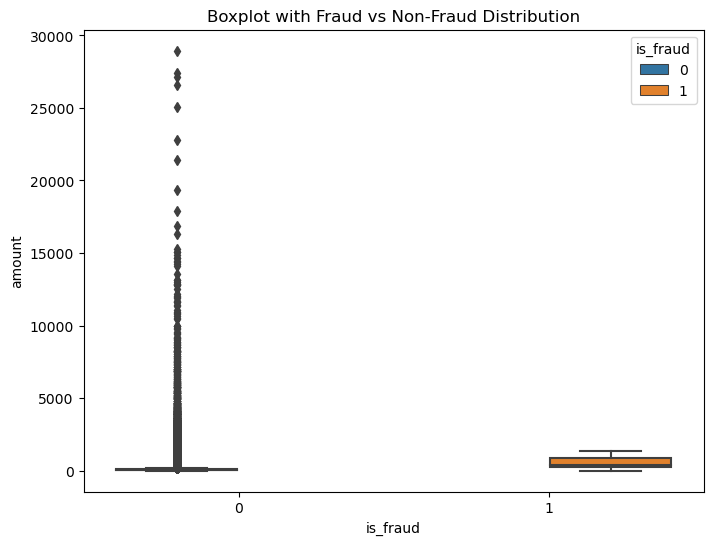

In [30]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.boxplot(x='is_fraud', y='amount', data=df, hue='is_fraud')
plt.title('Boxplot with Fraud vs Non-Fraud Distribution')
plt.show()

In [31]:
df_before_outliers_removal = df

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned
df_after_remove_outliers = remove_outliers_iqr(df_before_outliers_removal, 'amount')

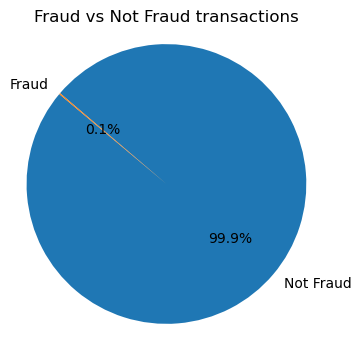

In [32]:
labels=["Not Fraud","Fraud"]
fraud_or_not = df_after_remove_outliers["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
plt.figure(figsize=(4, 4))  # Set the figure size (optional)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140) 
plt.axis('equal') 
plt.title('Fraud vs Not Fraud transactions')
plt.show()

Text(0.5, 1.0, 'Distribution of Fraud by Age')

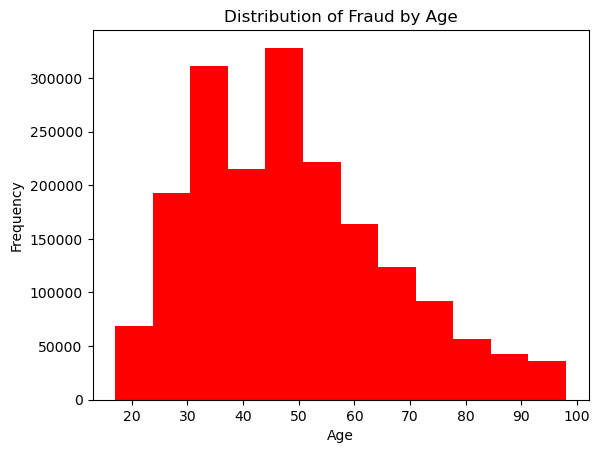

In [33]:
plt.hist(df['age'], bins = 12, color = 'r')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Distribution of Fraud by Age') 

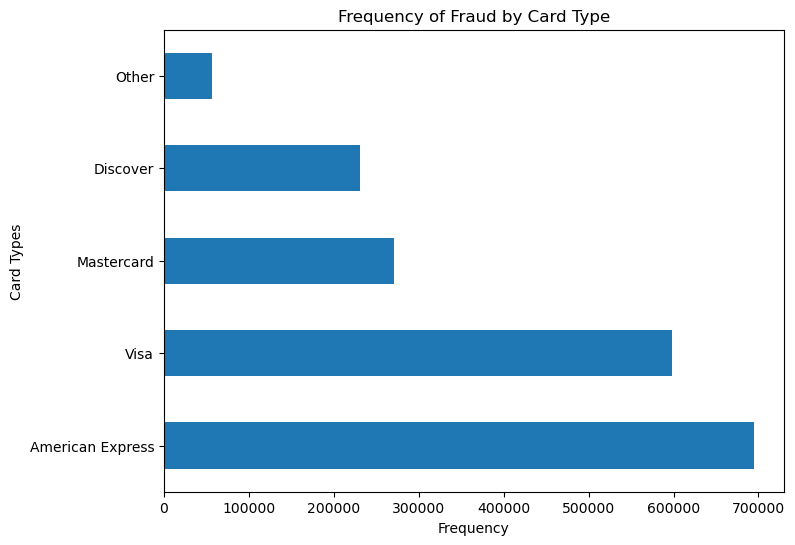

In [34]:
data = df['card_type'].value_counts()
plt.figure(figsize=(8, 6)) 
data.plot(kind='barh') 
plt.xlabel('Frequency')  
plt.ylabel('Card Types')  
plt.title('Frequency of Fraud by Card Type') 
plt.show()

In [35]:
# Data Splitting
X_standard = df[['standard_scaled_amount', 'standard_scaled_city_pop','gender_F','gender_M','age','card_type_encoded']]
y_standard = df['is_fraud']

X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, test_size=0.3, random_state=2)
print(np.mean(y_train_standard), np.mean(y_standard))


X_min_max = df[['min_max_scaled_amount', 'min_max_scaled_city_pop','gender_F','gender_M','age','card_type_encoded']]
y_min_max = df['is_fraud']

X_train_min_max, X_test_min_max, y_train_min_max, y_test_min_max = train_test_split(X_min_max, y_min_max, test_size=0.3, random_state=2)
print(np.mean(y_train_standard), np.mean(y_standard))

0.005210249291456996 0.005210014716091717
0.005210249291456996 0.005210014716091717


# Modeling



### Logistic Regression

In [36]:
# Running Logistic Regression for data normalised using standard scalar:
logreg_standard = LogisticRegression()
logreg_standard.fit(X_train_standard, y_train_standard)
print(logreg_standard.coef_, logreg_standard.intercept_)
y_test_pred_logreg_standard = logreg_standard.predict(X_test_standard)

[[ 3.96887105e-01  6.33471414e-03 -2.05040648e+00 -1.88188208e+00
   9.85944747e-03  6.33369181e-04]] [-3.9353592]


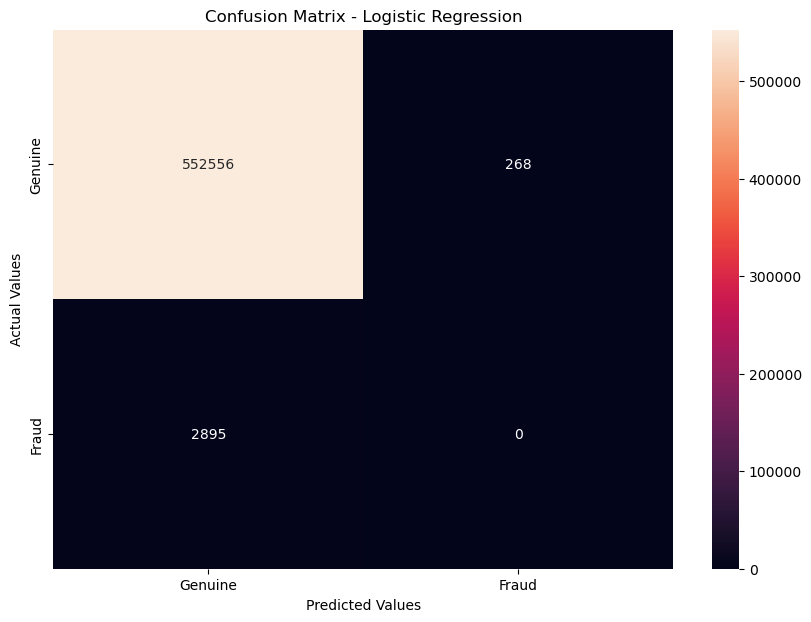

In [41]:
# Calculate and display the confusion matrix for Logistic Regression with standard scaling
#confusion_matrix(y_test_standard,y_test_pred_logreg_standard)
confusion_matrix_rf = confusion_matrix(y_test_standard, y_test_pred_logreg_standard)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [38]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with standard scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_standard, y_test_pred_logreg_standard))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_standard, y_test_pred_logreg_standard))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_standard, y_test_pred_logreg_standard))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_standard, y_test_pred_logreg_standard))

Precision score for Logistic Regression with standard scaling: 0.0
Recall score for Logistic Regression with standard scaling: 0.0
Accuracy score for Logistic Regression with standard scaling: 0.9943082745056404
F1 score for Logistic Regression with standard scaling: 0.0


In [39]:
# Running Logistic Regression for data normalised using minmax scalar:
logreg_min_max = LogisticRegression()
logreg_min_max.fit(X_train_min_max, y_train_min_max)
print(logreg_min_max.coef_, logreg_min_max.intercept_)
y_test_pred_logreg_min_max = logreg_min_max.predict(X_test_min_max)

[[ 4.20519853e+01  1.13272818e-01 -1.53546665e+00 -1.37486099e+00
   9.02823786e-03  1.15499781e-03]] [-4.40854325]


In [108]:
# Calculate and display the confusion matrix for Logistic Regression with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_logreg_min_max)

array([[552719,    105],
       [  2895,      0]])

In [109]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with min-max scaling
print('Precision score for Logistic Regression with min max scaling:', precision_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Recall score for Logistic Regression with min max scaling:', recall_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Accuracy score for Logistic Regression with min max scaling:', accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))
print('F1 score for Logistic Regression with min max scaling:', f1_score(y_test_min_max, y_test_pred_logreg_min_max))

Precision score for Logistic Regression with min max scaling: 0.0
Recall score for Logistic Regression with min max scaling: 0.0
Accuracy score for Logistic Regression with min max scaling: 0.9946015882127478
F1 score for Logistic Regression with min max scaling: 0.0


### SMOTE (Synthetic Minority Oversampling Technique)

In [42]:
method= SMOTE()
X_train_standard, y_train_standard = method.fit_resample(X_train_standard, y_train_standard)
X_train_min_max, y_train_min_max = method.fit_resample(X_train_min_max, y_train_min_max)

### Logistic Regression (after SMOTE)

In [43]:
# Running Logistic Regression for data normalised using standard scalar:
logreg_standard = LogisticRegression()
logreg_standard.fit(X_train_standard, y_train_standard)
print(logreg_standard.coef_, logreg_standard.intercept_)
y_test_pred_logreg_standard = logreg_standard.predict(X_test_standard)

[[ 1.25650359e+00 -8.19288953e-02 -7.79576472e+00 -7.91486706e+00
   4.01462164e-03 -2.67978956e-02]] [6.70359477]


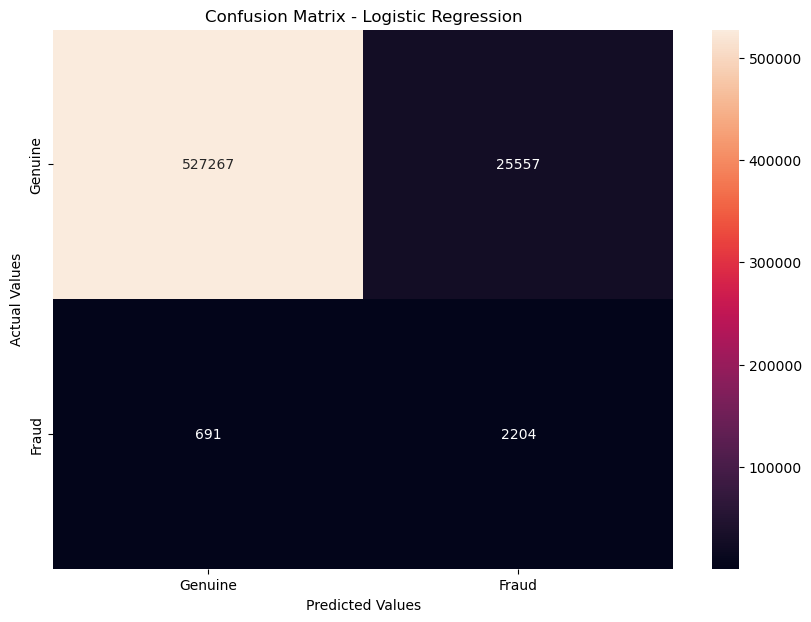

In [45]:
# Calculate and display the confusion matrix for Logistic Regression with standard scaling
#confusion_matrix(y_test_standard,y_test_pred_logreg_standard)
confusion_matrix_rf = confusion_matrix(y_test_standard, y_test_pred_logreg_standard)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [113]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with standard scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_standard, y_test_pred_logreg_standard))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_standard, y_test_pred_logreg_standard))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_standard, y_test_pred_logreg_standard))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_standard, y_test_pred_logreg_standard))

Precision score for Logistic Regression with standard scaling: 0.0791268758526603
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.95260014503733
F1 score for Logistic Regression with standard scaling: 0.14335425542294059


In [114]:
# Running Logistic Regression for data normalised using minmax scalar:
logreg_min_max = LogisticRegression()
logreg_min_max.fit(X_train_min_max, y_train_min_max)
print(logreg_min_max.coef_, logreg_min_max.intercept_)
y_test_pred_logreg_min_max = logreg_min_max.predict(X_test_min_max)

[[ 2.27939279e+02 -6.41937157e-01 -3.65154376e+00 -3.77913170e+00
   3.71737044e-03 -1.11044032e-02]] [1.99667312]


In [115]:
# Calculate and display the confusion matrix for Logistic Regression with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_logreg_min_max)

array([[528478,  24346],
       [   691,   2204]])

In [116]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with min-max scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_min_max, y_test_pred_logreg_min_max))

Precision score for Logistic Regression with standard scaling: 0.08301318267419962
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.9549466546941889
F1 score for Logistic Regression with standard scaling: 0.14970283579555102


### KNN

In [117]:
# knn_standard = KNeighborsClassifier()
# param_knn = {'n_neighbors': range(3, 26, 2)}
# f1_scoring = make_scorer(f1_score)
# grid_knn = GridSearchCV(knn_standard, param_knn, cv = 5,scoring=f1_scoring)
# grid_knn.fit(X_train_standard, y_train_standard)
# print(grid_knn.best_params_)

In [118]:
# Run the KNN Model for data normalised using standard scalar:
knn_standard = KNeighborsClassifier(n_neighbors = 3)
knn_standard.fit(X_train_standard, y_train_standard)
y_test_pred_knn_standard = knn_standard.predict(X_test_standard)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_knn_standard))

The F1 score is  0.14936758124148666


In [119]:
# knn = KNeighborsClassifier()
# param_knn = {'n_neighbors': range(3, 26, 2)}
# f1_scoring = make_scorer(f1_score)
# grid_knn = GridSearchCV(knn, param_knn, cv = 5,scoring=f1_scoring)
# grid_knn.fit(X_train_min_max, y_train_min_max)
# print(grid_knn.best_params_)

In [120]:
# Run the KNN Model for data normalised using minmax scalar:
knn_min_max = KNeighborsClassifier(n_neighbors = 9)
knn_min_max.fit(X_train_min_max, y_train_min_max)
y_test_pred_knn_min_max = knn_min_max.predict(X_test_min_max)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_knn_min_max))

The F1 score is  0.13018806262812324


### Decision Tree

In [121]:
# opt_tree = DecisionTreeClassifier(random_state = 0)

# dt_params = {'max_depth':  range(1,5)         , # max_depth is too high
# 'min_samples_split':   range(50,300,50), # too low 50,100, 200, ...
# 'max_leaf_nodes':    range(2,11)   }
# f1_scoring = make_scorer(f1_score)
# grid_tree = GridSearchCV(opt_tree, dt_params,scoring=f1_scoring)
# grid_tree.fit(X_test_standard, y_test_standard)
# grid_tree.best_params_

In [227]:
# Run the Decision Tree Classifier Model for data normalised using standard scalar:
dtc_standard = DecisionTreeClassifier(random_state=0,max_depth= 3, max_leaf_nodes= 6, min_samples_split= 50)
dtc_standard.fit(X_train_standard,y_train_standard)
y_test_pred_dtc_standard = dtc_standard.predict(X_test_standard)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_dtc_standard))

The F1 score is  0.05244676584798067


In [123]:
#opt_tree = DecisionTreeClassifier(random_state = 0)

#dt_params = {'max_depth':  range(1,5)         , # max_depth is too high
#'min_samples_split':   range(50,300,50), # too low 50,100, 200, ...
#              'max_leaf_nodes':    range(2,11)   }

# f1_scoring = make_scorer(f1_score)
# grid_tree = GridSearchCV(opt_tree, dt_params,scoring=f1_scoring)
# grid_tree.fit(X_test_min_max, y_test_min_max)
# grid_tree.best_params_

In [228]:
# Run the Decision Tree Classifier Model for data normalised using minmax scalar:
dtc_min_max = DecisionTreeClassifier(random_state=0,max_depth= 3, max_leaf_nodes= 6, min_samples_split= 50)
dtc_min_max.fit(X_train_min_max,y_train_min_max)
y_test_pred_dtc_min_max = dtc_min_max.predict(X_test_min_max)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_dtc_min_max))

The F1 score is  0.19877745075843334


### Random Forest

In [125]:
# Run the Random Forest Classifier Model for data normalised using standard scalar: 
rfc_standard = RandomForestClassifier(random_state=0)
rfc_standard.fit(X_train_standard,y_train_standard)
y_test_pred_rfc_standard = rfc_standard.predict(X_test_standard)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_rfc_standard))

The F1 score is  0.14695238095238095


In [126]:
# Run the Random Forest Classifier Model for data normalised using minmax scalar: 
rfc_min_max = RandomForestClassifier(random_state=0)
rfc_min_max.fit(X_train_min_max,y_train_min_max)
y_test_pred_rfc_min_max = rfc_min_max.predict(X_test_min_max)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_rfc_min_max))

The F1 score is  0.08411172781011687


### Naive Bayes

In [127]:
# Run the Naive Bayes Model for data normalised using standard scalar: 
cat_nb_standard = CategoricalNB(alpha = 0)
cat_nb_standard.fit(X_train_standard,y_train_standard)
y_test_pred_cat_nb_standard = cat_nb_standard.predict(X_test_standard)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_cat_nb_standard))

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The F1 score is  0.20641103862580373


In [128]:
# Run the Naive Bayes Model for data normalised using minmax scalar: 
cat_nb_min_max = CategoricalNB(alpha = 0)
cat_nb_min_max.fit(X_train_min_max,y_train_min_max)
y_test_pred_cat_nb_min_max = cat_nb_min_max.predict(X_test_min_max)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_cat_nb_min_max))

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The F1 score is  0.012917387435808263


### Gaussian Naive Bayes

In [129]:
# Run the Gaussian Naive Bayes Model for data normalised using standard scalar: 
g_nb_standard = GaussianNB()
g_nb_standard.fit(X_train_standard,y_train_standard)
y_test_pred_g_nb_standard = g_nb_standard.predict(X_test_standard)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_g_nb_standard))

The F1 score is  0.25139311043566365


In [130]:
# Run the Gaussian Naive Bayes Model for data normalised using minmax scalar: 
g_nb_min_max = GaussianNB()
g_nb_min_max.fit(X_train_min_max,y_train_min_max)
y_test_pred_g_nb_min_max = g_nb_min_max.predict(X_test_min_max)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_g_nb_min_max))

The F1 score is  0.251629889669007


### SVM

In [131]:
svc_standard = LinearSVC(random_state = 0)
svc_standard.fit(X_train_standard, y_train_standard)
y_test_pred_svc_standard = svc_standard.predict(X_test_standard)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_svc_standard))

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The F1 score is  0.010435474824959745


In [132]:
svc_min_max = LinearSVC(random_state = 0) 
svc_min_max.fit(X_train_min_max, y_train_min_max)
y_test_pred_svc_min_max = svc_min_max.predict(X_test_min_max)
print("The F1 score is ",f1_score(y_test_standard, y_test_pred_svc_min_max))

/Users/shreyas/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The F1 score is  0.21095553917956275


### Extension - Unsupervised + Supervised

In [133]:
#PCA + Random Forest for data normalised using standard scalar: 

n_components = 2  # Set the number of components you want to keep
pca = PCA(n_components=n_components)
X_train_pca_standard = pca.fit_transform(X_train_standard)
X_test_pca_standard = pca.transform(X_test_standard)

# Train a RandomForest classifier on the reduced data
pca_rfc_standard = RandomForestClassifier(random_state=0)
pca_rfc_standard.fit(X_train_pca_standard, y_train_standard)

# Make predictions on the test data
y_pred_pca_rfc_standard = pca_rfc_standard.predict(X_test_pca_standard)

# Evaluate the model
print("F1 score is:", f1_score(y_test_standard,y_pred_pca_rfc_standard))

F1 score is: 0.12650461610377467


In [134]:
#PCA + Random Forest for data normalised using min max scalar: 

n_components = 2  # Set the number of components you want to keep
pca = PCA(n_components=n_components)
X_train_pca_min_max = pca.fit_transform(X_train_min_max)
X_test_pca_min_max = pca.transform(X_test_min_max)

# Train a RandomForestNaive Bayes classifier on the reduced data
pca_rfc_min_max = RandomForestClassifier(random_state=0)
pca_rfc_min_max.fit(X_train_pca_min_max, y_train_min_max)

# Make predictions on the test data
y_pred_pca_rfc_min_max = pca_rfc_min_max.predict(X_test_pca_min_max)

# Evaluate the model
print("F1 score is:", f1_score(y_test_min_max,y_pred_pca_rfc_min_max))

F1 score is: 0.057072375934582996


# Performance Evaluation

### Logistic Regression

In [135]:
# Calculate and display the confusion matrix for Logistic Regression with standard scaling
confusion_matrix(y_test_standard,y_test_pred_logreg_standard)

array([[527174,  25650],
       [   691,   2204]])

In [136]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with standard scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_standard, y_test_pred_logreg_standard))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_standard, y_test_pred_logreg_standard))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_standard, y_test_pred_logreg_standard))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_standard, y_test_pred_logreg_standard))

Precision score for Logistic Regression with standard scaling: 0.0791268758526603
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.95260014503733
F1 score for Logistic Regression with standard scaling: 0.14335425542294059


In [137]:
ndf_lr_standard = [(recall_score(y_test_standard, y_test_pred_logreg_standard), precision_score(y_test_standard, y_test_pred_logreg_standard), f1_score(y_test_standard, y_test_pred_logreg_standard), accuracy_score(y_test_standard, y_test_pred_logreg_standard))]
ndf_lr_standard_score = pd.DataFrame(data = ndf_lr_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_lr_standard_score.insert(0, 'Model', 'Logistic Regression Standard')
ndf_lr_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Logistic Regression Standard,0.761313,0.079127,0.143354,0.9526


Text(0, 0.5, 'Precision')

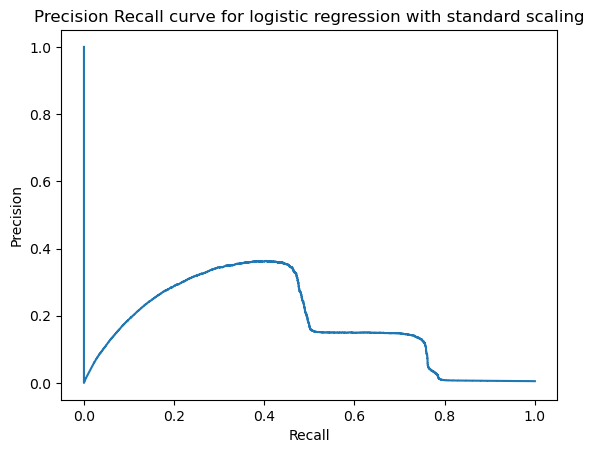

In [138]:
# Calculate precision, recall, and plot the Precision-Recall curve for Logistic Regression with standard scaling
y_pred_proba_logreg_standard = logreg_standard.predict_proba(X_test_standard)[:,1]
logreg_standard.predict_proba(X_test_standard).shape
logreg_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_logreg_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for logistic regression with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [139]:
# Calculate and display the Area Under the Curve (AUC) for Logistic Regression with standard scaling
print("AUC for logistic regression with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_logreg_standard)  )

AUC for logistic regression with standard scaling: 0.8334290447562732


Text(0, 0.5, 'TPR')

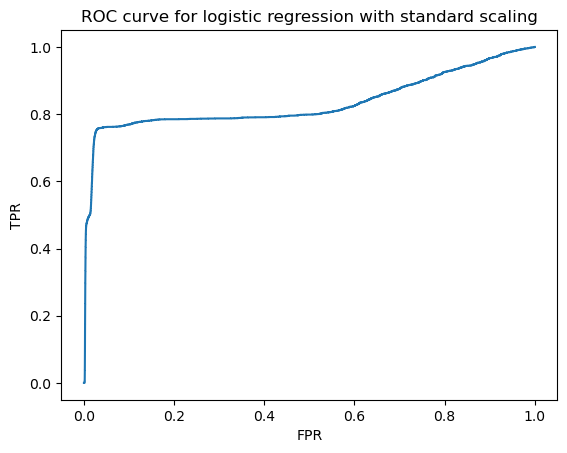

In [140]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for logistic regression with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_logreg_standard)
plt.title('ROC curve for logistic regression with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [141]:
# Calculate and display the confusion matrix for Logistic Regression with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_logreg_min_max)

array([[528478,  24346],
       [   691,   2204]])

In [142]:
# Calculate and display precision, recall, accuracy, and F1 scores for Logistic Regression with min-max scaling
print('Precision score for Logistic Regression with standard scaling:', precision_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Recall score for Logistic Regression with standard scaling:', recall_score(y_test_min_max, y_test_pred_logreg_min_max))
print('Accuracy score for Logistic Regression with standard scaling:', accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))
print('F1 score for Logistic Regression with standard scaling:', f1_score(y_test_min_max, y_test_pred_logreg_min_max))

Precision score for Logistic Regression with standard scaling: 0.08301318267419962
Recall score for Logistic Regression with standard scaling: 0.7613126079447323
Accuracy score for Logistic Regression with standard scaling: 0.9549466546941889
F1 score for Logistic Regression with standard scaling: 0.14970283579555102


In [143]:
ndf_lr_min_max = [(recall_score(y_test_min_max, y_test_pred_logreg_min_max), precision_score(y_test_min_max, y_test_pred_logreg_min_max), f1_score(y_test_min_max, y_test_pred_logreg_min_max), accuracy_score(y_test_min_max, y_test_pred_logreg_min_max))]
ndf_lr_min_max_score = pd.DataFrame(data = ndf_lr_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_lr_min_max_score.insert(0, 'Model', 'Logistic Regression Min Max')
ndf_lr_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Logistic Regression Min Max,0.761313,0.083013,0.149703,0.954947


Text(0, 0.5, 'Precision')

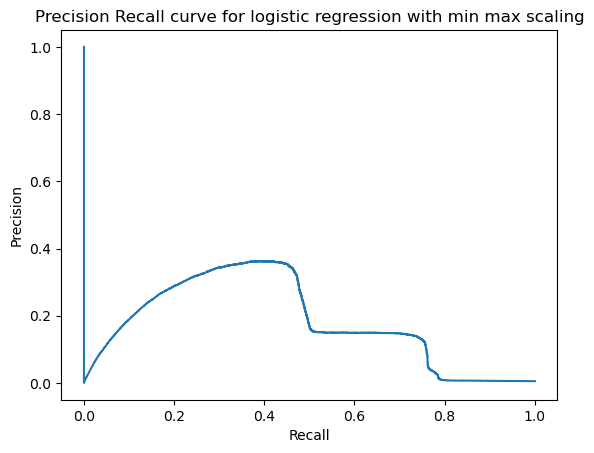

In [144]:
# Calculate precision, recall, and plot the Precision-Recall curve for Logistic Regression with min-max scaling
y_pred_proba_logreg_min_max = logreg_min_max.predict_proba(X_test_min_max)[:,1]
logreg_min_max.predict_proba(X_test_min_max).shape
logreg_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_logreg_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for logistic regression with min max scaling')
plt.ylabel("Precision")

In [145]:
# Calculate and display the Area Under the Curve (AUC) for Logistic Regression with min-max scaling
print("AUC for logistic regression with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_logreg_min_max)  )

AUC for logistic regression with min max scaling: 0.8328145925294815


Text(0, 0.5, 'TPR')

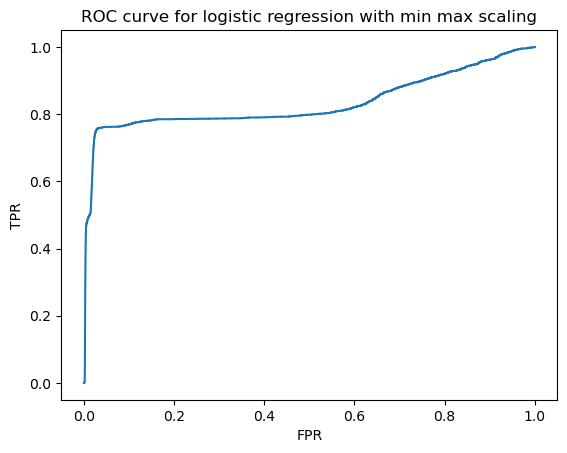

In [146]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for logistic regression with min-max scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_logreg_min_max)
plt.title('ROC curve for logistic regression with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### KNN

In [147]:
# Calculate and display the confusion matrix for KNN with standard scaling
confusion_matrix(y_test_standard,y_test_pred_knn_standard)

array([[531943,  20881],
       [   976,   1919]])

In [148]:
# Calculate and display precision, recall, accuracy, and F1 scores for KNN with standard scaling
print('Precision score for KNN with standard scaling:', precision_score(y_test_standard,y_test_pred_knn_standard))
print('Recall score for KNN with standard scaling:', recall_score(y_test_standard,y_test_pred_knn_standard))
print('Accuracy score for KNN with standard scaling:', accuracy_score(y_test_standard,y_test_pred_knn_standard))
print('F1 score for KNN with standard scaling:', f1_score(y_test_standard,y_test_pred_knn_standard))

Precision score for KNN with standard scaling: 0.08416666666666667
Recall score for KNN with standard scaling: 0.66286701208981
Accuracy score for KNN with standard scaling: 0.9606689711886763
F1 score for KNN with standard scaling: 0.14936758124148666


In [149]:
ndf_knn_standard = [(recall_score(y_test_standard, y_test_pred_knn_standard), precision_score(y_test_standard, y_test_pred_knn_standard), f1_score(y_test_standard, y_test_pred_knn_standard), accuracy_score(y_test_standard, y_test_pred_knn_standard))]
ndf_knn_standard_score = pd.DataFrame(data = ndf_knn_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_knn_standard_score.insert(0, 'Model', 'KNN Standard')
ndf_knn_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,KNN Standard,0.662867,0.084167,0.149368,0.960669


Text(0, 0.5, 'Precision')

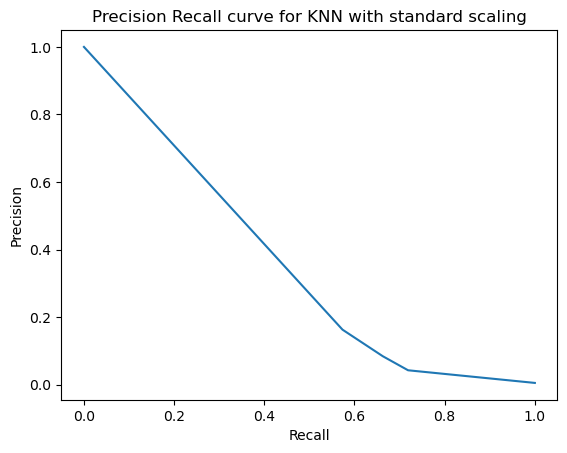

In [150]:
# Calculate precision, recall, and plot the Precision-Recall curve for KNN with standard scaling
y_pred_proba_knn_standard = knn_standard.predict_proba(X_test_standard)[:,1]
knn_standard.predict_proba(X_test_standard).shape
knn_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_knn_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for KNN with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [151]:
# Calculate and display the Area Under the Curve (AUC) for KNN with standard scaling
print("AUC for KNN with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_knn_standard)  )

AUC for KNN with standard scaling: 0.8373105116396923


Text(0, 0.5, 'TPR')

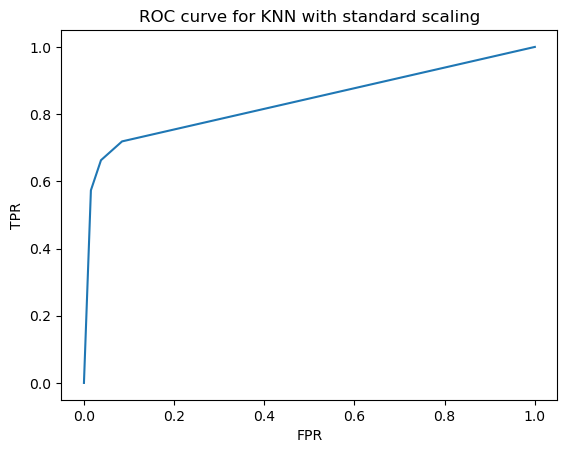

In [152]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for KNN with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_knn_standard)
plt.title('ROC curve for KNN with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [153]:
confusion_matrix(y_test_min_max,y_test_pred_knn_min_max)

array([[524251,  28573],
       [   704,   2191]])

In [154]:
print('Precision score with minmax scaling:', precision_score(y_test_min_max,y_test_pred_knn_min_max))
print('Recall score with minmax scaling:', recall_score(y_test_min_max,y_test_pred_knn_min_max))
print('Accuracy score with minmax scaling:', accuracy_score(y_test_min_max,y_test_pred_knn_min_max))
print('F1 score with minmax scaling:', f1_score(y_test_min_max,y_test_pred_knn_min_max))

Precision score with minmax scaling: 0.07121960733324666
Recall score with minmax scaling: 0.7568221070811745
Accuracy score with minmax scaling: 0.9473168993682058
F1 score with minmax scaling: 0.13018806262812324


In [155]:
ndf_knn_min_max = [(recall_score(y_test_min_max, y_test_pred_knn_min_max), precision_score(y_test_min_max, y_test_pred_knn_min_max), f1_score(y_test_min_max, y_test_pred_knn_min_max), accuracy_score(y_test_min_max, y_test_pred_knn_min_max))]
ndf_knn_min_max_score = pd.DataFrame(data = ndf_knn_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_knn_min_max_score.insert(0, 'Model', 'KNN Min Max')
ndf_knn_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,KNN Min Max,0.756822,0.07122,0.130188,0.947317


Text(0, 0.5, 'Precision')

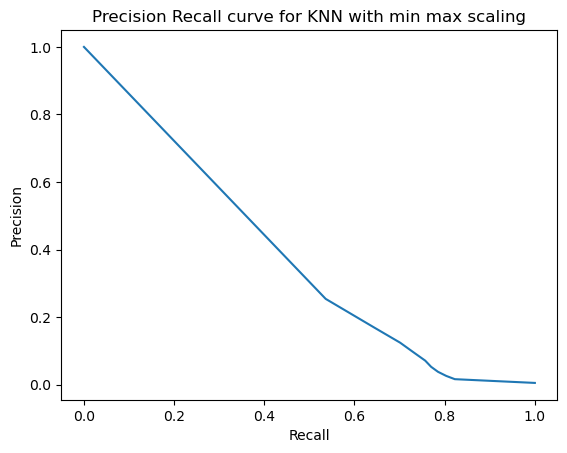

In [156]:
# Calculate precision, recall, and plot the Precision-Recall curve for KNN with min-max scaling
y_pred_proba_knn_min_max = knn_min_max.predict_proba(X_test_min_max)[:,1]
knn_min_max.predict_proba(X_test_min_max).shape
knn_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_knn_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for KNN with min max scaling')
plt.ylabel("Precision")

In [157]:
# Calculate and display the Area Under the Curve (AUC) for KNN with standard scaling
print("AUC for KNN with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_knn_min_max)  )

AUC for KNN with min max scaling: 0.8728260606048336


Text(0, 0.5, 'TPR')

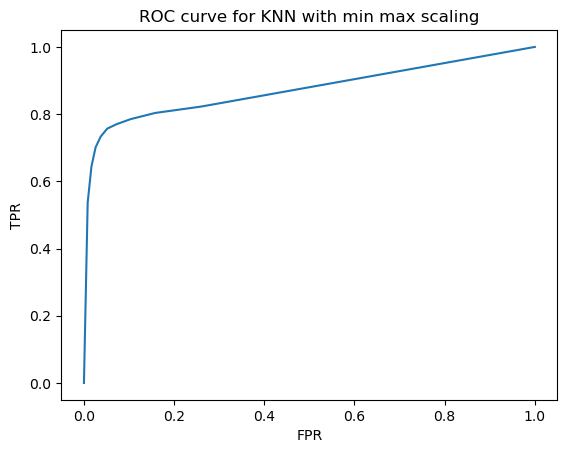

In [158]:
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and plot the ROC curve for KNN with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_knn_min_max)
plt.title('ROC curve for KNN with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Decision Tree

In [229]:
# Calculate and display the confusion matrix for KNN with standard scaling
confusion_matrix(y_test_standard,y_test_pred_dtc_standard)

array([[456163,  96661],
       [   214,   2681]])

In [230]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Decision Tree with standard scaling:', precision_score(y_test_standard,y_test_pred_dtc_standard))
print('Recall score for Decision Tree with standard scaling:', recall_score(y_test_standard,y_test_pred_dtc_standard))
print('Accuracy score for Decision Tree with standard scaling:', accuracy_score(y_test_standard,y_test_pred_dtc_standard))
print('F1 score for Decision Tree with standard scaling:', f1_score(y_test_standard,y_test_pred_dtc_standard))

Precision score for Decision Tree with standard scaling: 0.026987578264983592
Recall score for Decision Tree with standard scaling: 0.9260794473229707
Accuracy score for Decision Tree with standard scaling: 0.825676286036648
F1 score for Decision Tree with standard scaling: 0.05244676584798067


In [231]:
ndf_dt_standard = [(recall_score(y_test_standard, y_test_pred_dtc_standard), precision_score(y_test_standard, y_test_pred_dtc_standard), f1_score(y_test_standard, y_test_pred_dtc_standard), accuracy_score(y_test_standard, y_test_pred_dtc_standard))]
ndf_dt_standard_score = pd.DataFrame(data = ndf_dt_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_dt_standard_score.insert(0, 'Model', 'Decision Tree Standard')
ndf_dt_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Decision Tree Standard,0.926079,0.026988,0.052447,0.825676


Text(0, 0.5, 'Precision')

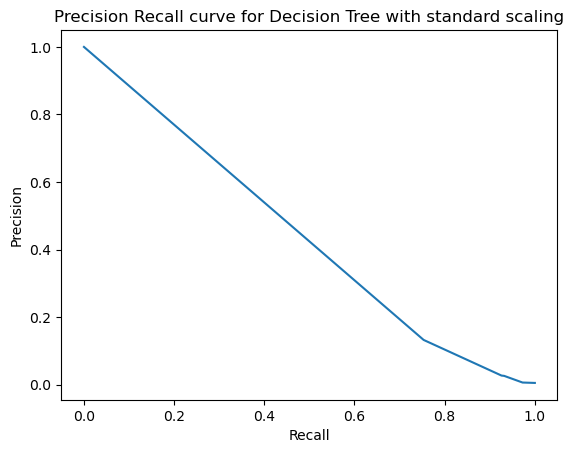

In [232]:
# Calculate precision, recall, and plot the Precision-Recall curve for KNN with standard scaling
y_pred_proba_dtc_standard = dtc_standard.predict_proba(X_test_standard)[:,1]
dtc_standard.predict_proba(X_test_standard).shape
dtc_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_dtc_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Decision Tree with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [233]:
# Calculate and display the Area Under the Curve (AUC) for Decision Tree with standard scaling
print("AUC for Decision Tree with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_dtc_standard)  )

AUC for Decision Tree with standard scaling: 0.9274117349093942


Text(0, 0.5, 'TPR')

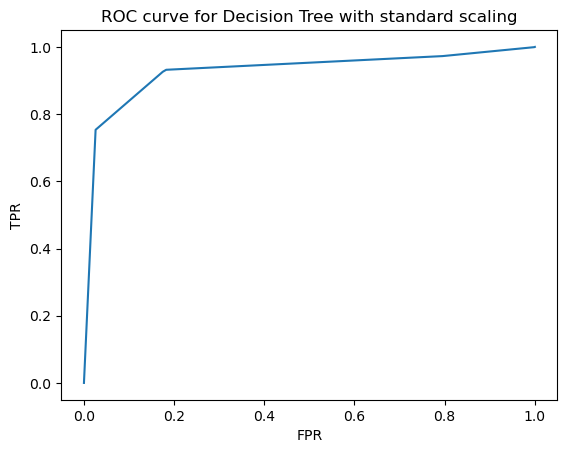

In [234]:
# Plot the ROC curve for Decision Tree with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_dtc_standard)
plt.title('ROC curve for Decision Tree with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [235]:
# Compute the confusion matrix for Decision Tree with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_dtc_min_max)

array([[535829,  16995],
       [   700,   2195]])

In [236]:
# Calculate and print precision, recall, accuracy, and F1 score for Decision Tree with min-max scaling
print('Precision score for Decision Tree with minmax scaling:', precision_score(y_test_min_max,y_test_pred_dtc_min_max))
print('Recall score for Decision Tree with minmax scaling:', recall_score(y_test_min_max,y_test_pred_dtc_min_max))
print('Accuracy score for Decision Tree with minmax scaling:', accuracy_score(y_test_min_max,y_test_pred_dtc_min_max))
print('F1 score for Decision Tree with minmax scaling:', f1_score(y_test_min_max,y_test_pred_dtc_min_max))

Precision score for Decision Tree with minmax scaling: 0.11438249088066701
Recall score for Decision Tree with minmax scaling: 0.7582037996545768
Accuracy score for Decision Tree with minmax scaling: 0.9681583678081909
F1 score for Decision Tree with minmax scaling: 0.19877745075843334


In [237]:
ndf_dt_min_max = [(recall_score(y_test_standard, y_test_pred_dtc_min_max), precision_score(y_test_standard, y_test_pred_dtc_min_max), f1_score(y_test_standard, y_test_pred_dtc_min_max), accuracy_score(y_test_standard, y_test_pred_dtc_min_max))]
ndf_dt_min_max_score = pd.DataFrame(data = ndf_dt_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_dt_min_max_score.insert(0, 'Model', 'Decision Tree Min Max')
ndf_dt_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Decision Tree Min Max,0.758204,0.114382,0.198777,0.968158


Text(0, 0.5, 'Precision')

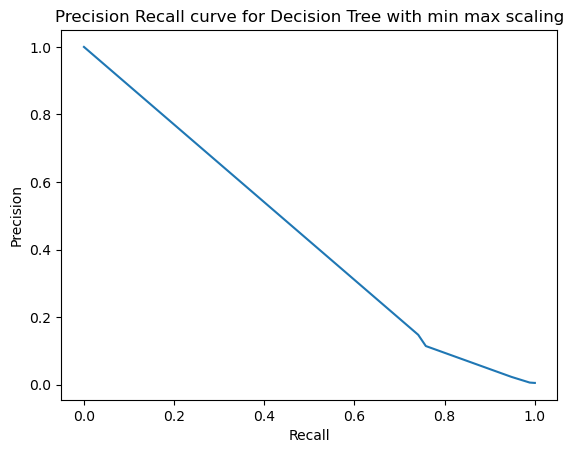

In [238]:
# Calculate and plot the Precision-Recall curve for Decision Tree with min-max scaling
y_pred_proba_dtc_min_max = dtc_min_max.predict_proba(X_test_min_max)[:,1]
dtc_min_max.predict_proba(X_test_min_max).shape
dtc_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_dtc_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for Decision Tree with min max scaling')
plt.ylabel("Precision")

In [239]:
# Calculate and print the AUC (Area Under the Curve) for the Decision Tree with min-max scaling
print("AUC for Decision Tree with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_dtc_min_max)  )

AUC for Decision Tree with min max scaling: 0.9369535696844816


Text(0, 0.5, 'TPR')

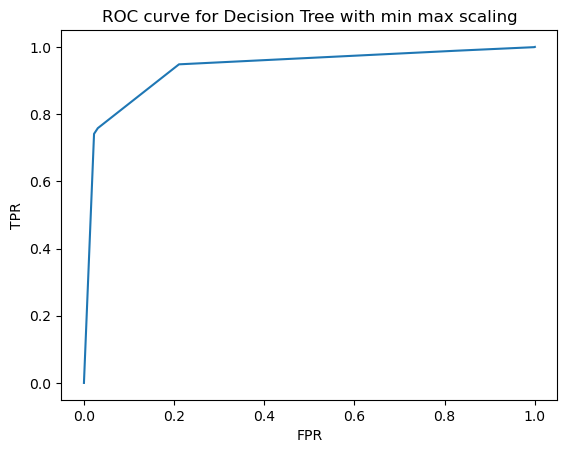

In [240]:
# Plot the ROC curve for the Decision Tree with min-max scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_dtc_min_max)
plt.title('ROC curve for Decision Tree with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Random Forest

In [171]:
# Calculate and display the confusion matrix for Random Forest with standard scaling
confusion_matrix(y_test_standard,y_test_pred_rfc_standard)

array([[536262,  16562],
       [  1352,   1543]])

In [172]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Random Forest with standard scaling:', precision_score(y_test_standard,y_test_pred_rfc_standard))
print('Recall score for Random Forest with standard scaling:', recall_score(y_test_standard,y_test_pred_rfc_standard))
print('Accuracy score for Random Forest with standard scaling:', accuracy_score(y_test_standard,y_test_pred_rfc_standard))
print('F1 score for Random Forest with standard scaling:', f1_score(y_test_standard,y_test_pred_rfc_standard))

Precision score for Random Forest with standard scaling: 0.08522507594587131
Recall score for Random Forest with standard scaling: 0.5329879101899827
Accuracy score for Random Forest with standard scaling: 0.9677642837477214
F1 score for Random Forest with standard scaling: 0.14695238095238095


In [173]:
ndf_rf_standard = [(recall_score(y_test_standard, y_test_pred_rfc_standard), precision_score(y_test_standard, y_test_pred_rfc_standard), f1_score(y_test_standard, y_test_pred_rfc_standard), accuracy_score(y_test_standard, y_test_pred_rfc_standard))]
ndf_rf_standard_score = pd.DataFrame(data = ndf_rf_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_rf_standard_score.insert(0, 'Model', 'Random Forest Standard')
ndf_rf_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Random Forest Standard,0.532988,0.085225,0.146952,0.967764


Text(0, 0.5, 'Precision')

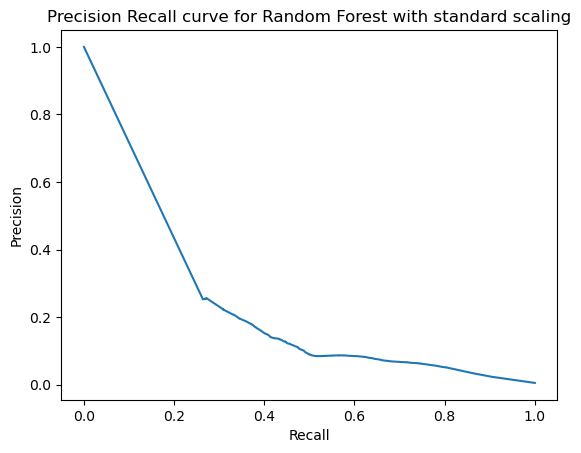

In [174]:
# Calculate precision, recall, and plot the Precision-Recall curve for Random Forest with standard scaling
y_pred_proba_rfc_standard = rfc_standard.predict_proba(X_test_standard)[:,1]
rfc_standard.predict_proba(X_test_standard).shape
rfc_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_rfc_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Random Forest with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [175]:
# Calculate and display the Area Under the Curve (AUC) for Random Forest with standard scaling
print("AUC for Random Forest with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_rfc_standard)  )

AUC for Random Forest with standard scaling: 0.9137990030001273


Text(0, 0.5, 'TPR')

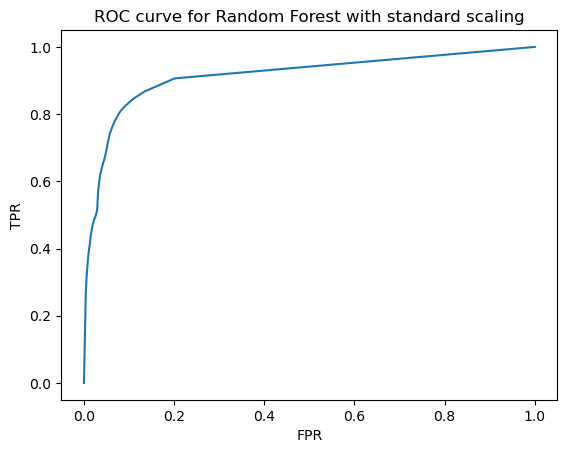

In [176]:
# Plot the ROC curve for Random Forest with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_rfc_standard)
plt.title('ROC curve for Random Forest with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [177]:
# Compute the confusion matrix for Random Forest with min-max scaling
confusion_matrix(y_test_min_max,y_test_pred_rfc_min_max)

array([[513261,  39563],
       [  1031,   1864]])

In [178]:
# Calculate and print precision, recall, accuracy, and F1 score for Random Forest with min-max scaling
print('Precision score for Random Forest with minmax scaling:', precision_score(y_test_min_max,y_test_pred_rfc_min_max))
print('Recall score for Random Forest with minmax scaling:', recall_score(y_test_min_max,y_test_pred_rfc_min_max))
print('Accuracy score for Random Forest with minmax scaling:', accuracy_score(y_test_min_max,y_test_pred_rfc_min_max))
print('F1 score for Random Forest with minmax scaling:', f1_score(y_test_min_max,y_test_pred_rfc_min_max))

Precision score for Random Forest with minmax scaling: 0.04499481014797113
Recall score for Random Forest with minmax scaling: 0.6438687392055268
Accuracy score for Random Forest with minmax scaling: 0.9269522906360949
F1 score for Random Forest with minmax scaling: 0.08411172781011687


In [179]:
ndf_rf_min_max = [(recall_score(y_test_standard, y_test_pred_rfc_min_max), precision_score(y_test_standard, y_test_pred_rfc_min_max), f1_score(y_test_standard, y_test_pred_rfc_min_max), accuracy_score(y_test_standard, y_test_pred_rfc_min_max))]
ndf_rf_min_max_score = pd.DataFrame(data = ndf_rf_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_rf_min_max_score.insert(0, 'Model', 'Random Forest Min Max')
ndf_rf_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Random Forest Min Max,0.643869,0.044995,0.084112,0.926952


Text(0, 0.5, 'Precision')

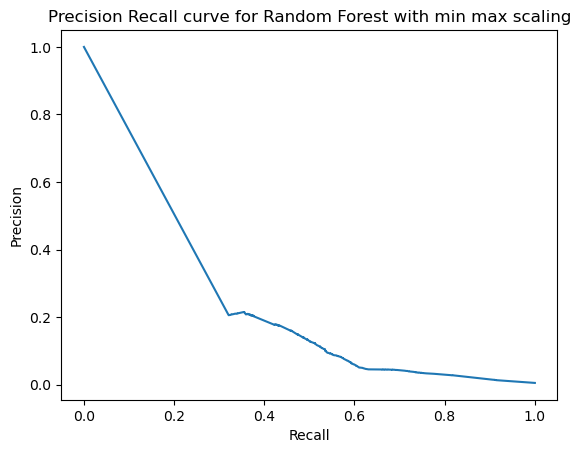

In [180]:
# Calculate and plot the Precision-Recall curve for Random Forest with min-max scaling
y_pred_proba_rfc_min_max = rfc_min_max.predict_proba(X_test_min_max)[:,1]
dtc_min_max.predict_proba(X_test_min_max).shape
dtc_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_rfc_min_max)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.title('Precision Recall curve for Random Forest with min max scaling')
plt.ylabel("Precision")

In [181]:
# Calculate and print the AUC (Area Under the Curve) for the Random Forest with min-max scaling
print("AUC for Random Forest with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_rfc_min_max)  )

AUC for Random Forest with min max scaling: 0.8946815005719604


Text(0, 0.5, 'TPR')

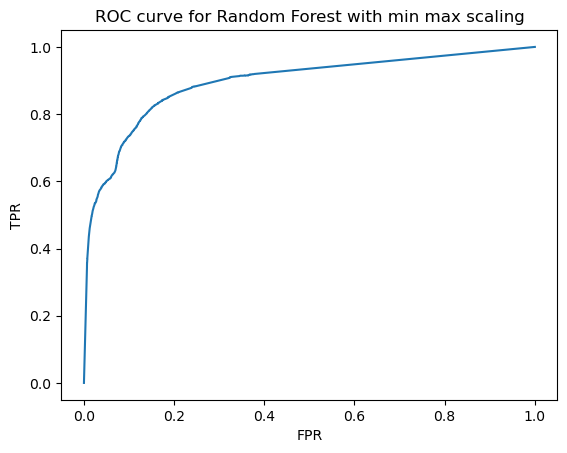

In [182]:
# Plot the ROC curve for the Random Forest with min-max scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_rfc_min_max)
plt.title('ROC curve for Random Forest with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Naive Bayes

In [183]:
# Calculate and display the confusion matrix for Naive Bayes with standard scaling
confusion_matrix(y_test_standard,y_test_pred_cat_nb_standard)

array([[536611,  16213],
       [   696,   2199]])

In [184]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Naive Bayes with standard scaling:', precision_score(y_test_standard,y_test_pred_cat_nb_standard))
print('Recall score for Naive Bayes with standard scaling:', recall_score(y_test_standard,y_test_pred_cat_nb_standard))
print('Accuracy score for Naive Bayes with standard scaling:', accuracy_score(y_test_standard,y_test_pred_cat_nb_standard))
print('F1 score for Naive Bayes with standard scaling:', f1_score(y_test_standard,y_test_pred_cat_nb_standard))

Precision score for Naive Bayes with standard scaling: 0.11943297849228764
Recall score for Naive Bayes with standard scaling: 0.7595854922279792
Accuracy score for Naive Bayes with standard scaling: 0.9695727516964509
F1 score for Naive Bayes with standard scaling: 0.20641103862580373


In [185]:
ndf_nb_standard = [(recall_score(y_test_standard, y_test_pred_cat_nb_standard), precision_score(y_test_standard, y_test_pred_cat_nb_standard), f1_score(y_test_standard, y_test_pred_cat_nb_standard), accuracy_score(y_test_standard, y_test_pred_cat_nb_standard))]
ndf_nb_standard_score = pd.DataFrame(data = ndf_nb_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_nb_standard_score.insert(0, 'Model', 'Naive Bayes Standard')
ndf_nb_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Naive Bayes Standard,0.759585,0.119433,0.206411,0.969573


Text(0, 0.5, 'Precision')

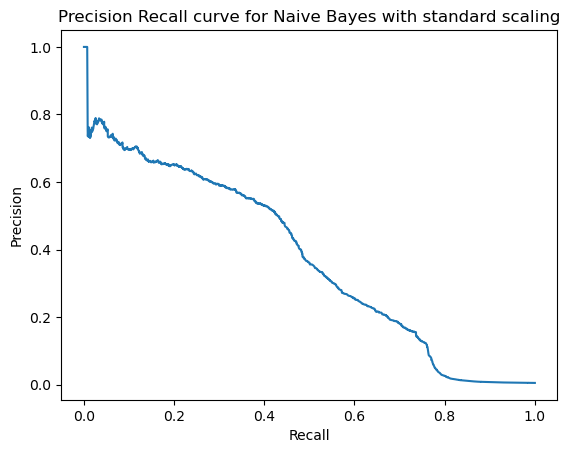

In [186]:
# Calculate precision, recall, and plot the Precision-Recall curve for Naive Bayes with standard scaling
y_pred_proba_cat_nb_standard = cat_nb_standard.predict_proba(X_test_standard)[:,1]
cat_nb_standard.predict_proba(X_test_standard).shape
cat_nb_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_cat_nb_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Naive Bayes with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [187]:
# Calculate and display the Area Under the Curve (AUC) for Naive Bayes with standard scaling
print("AUC for Naive Bayes with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_cat_nb_standard)  )

AUC for Naive Bayes with standard scaling: 0.8719905190462227


Text(0, 0.5, 'TPR')

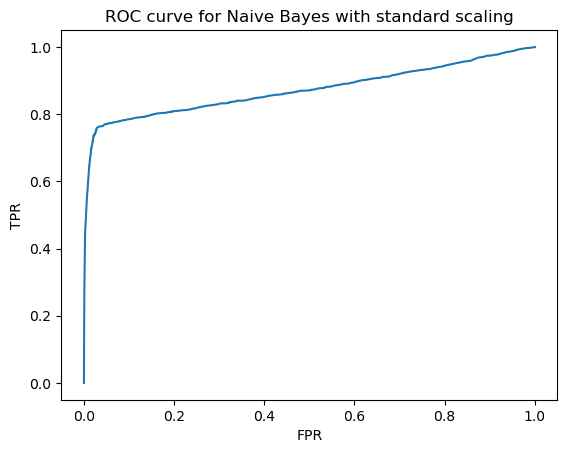

In [188]:
# Plot the ROC curve for Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_cat_nb_standard)
plt.title('ROC curve for Naive Bayes with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [189]:
# Calculate and display the confusion matrix for Naive Bayes with min max scaling
confusion_matrix(y_test_min_max,y_test_pred_cat_nb_min_max)

array([[335742, 217082],
       [  1465,   1430]])

In [190]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for Naive Bayes with min max scaling:', precision_score(y_test_min_max,y_test_pred_cat_nb_min_max))
print('Recall score for Naive Bayes with min max scaling:', recall_score(y_test_min_max,y_test_pred_cat_nb_min_max))
print('Accuracy score for Naive Bayes with min max scaling:', accuracy_score(y_test_min_max,y_test_pred_cat_nb_min_max))
print('F1 score for Naive Bayes with min max scaling:', f1_score(y_test_min_max,y_test_pred_cat_nb_min_max))

Precision score for Naive Bayes with min max scaling: 0.006544263015303507
Recall score for Naive Bayes with min max scaling: 0.4939550949913644
Accuracy score for Naive Bayes with min max scaling: 0.6067310997104651
F1 score for Naive Bayes with min max scaling: 0.012917387435808263


In [191]:
ndf_nb_min_max = [(recall_score(y_test_standard, y_test_pred_cat_nb_min_max), precision_score(y_test_standard, y_test_pred_cat_nb_min_max), f1_score(y_test_standard, y_test_pred_cat_nb_min_max), accuracy_score(y_test_standard, y_test_pred_cat_nb_min_max))]
ndf_nb_min_max_score = pd.DataFrame(data = ndf_nb_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_nb_min_max_score.insert(0, 'Model', 'Naive Bayes Min Max')
ndf_nb_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Naive Bayes Min Max,0.493955,0.006544,0.012917,0.606731


Text(0, 0.5, 'Precision')

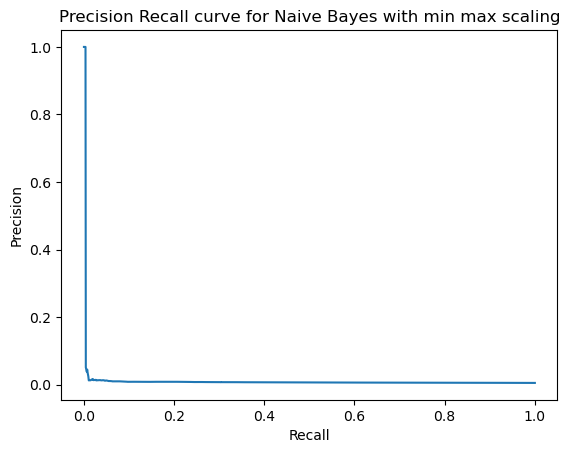

In [192]:
# Calculate precision, recall, and plot the Precision-Recall curve for Naive Bayes with min max scaling
y_pred_proba_cat_nb_min_max = cat_nb_min_max.predict_proba(X_test_min_max)[:,1]
cat_nb_min_max.predict_proba(X_test_min_max).shape
cat_nb_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_cat_nb_min_max)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Naive Bayes with min max scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [193]:
# Calculate and display the Area Under the Curve (AUC) for Naive Bayes with standard scaling
print("AUC for Naive Bayes with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_cat_nb_min_max)  )

AUC for Naive Bayes with min max scaling: 0.5750067378957251


Text(0, 0.5, 'TPR')

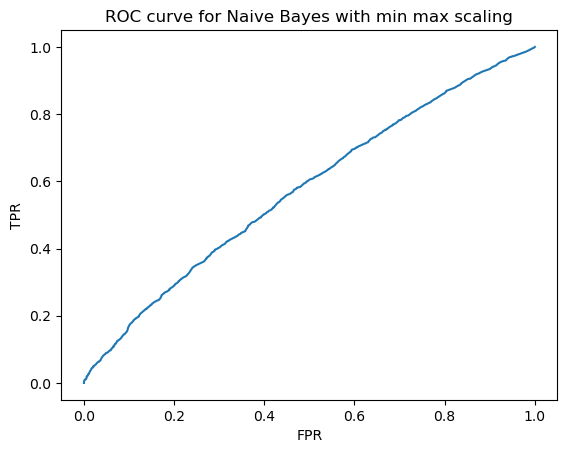

In [194]:
# Plot the ROC curve for Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_cat_nb_min_max)
plt.title('ROC curve for Naive Bayes with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### Gaussian Naive Bayes

In [195]:
# Calculate and display the confusion matrix for Gaussian Naive Bayes with standard scaling
confusion_matrix(y_test_standard,y_test_pred_g_nb_standard)

array([[541912,  10912],
       [   910,   1985]])

In [196]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for Gaussian Naive Bayes with standard scaling:', precision_score(y_test_standard,y_test_pred_g_nb_standard))
print('Recall score for Gaussian Naive Bayes with standard scaling:', recall_score(y_test_standard,y_test_pred_g_nb_standard))
print('Accuracy score for Gaussian Naive Bayes with standard scaling:', accuracy_score(y_test_standard,y_test_pred_g_nb_standard))
print('F1 score for Gaussian Naive Bayes with standard scaling:', f1_score(y_test_standard,y_test_pred_g_nb_standard))

Precision score for Gaussian Naive Bayes with standard scaling: 0.15391176242537025
Recall score for Gaussian Naive Bayes with standard scaling: 0.6856649395509499
Accuracy score for Gaussian Naive Bayes with standard scaling: 0.9787266586170349
F1 score for Gaussian Naive Bayes with standard scaling: 0.25139311043566365


In [197]:
ndf_gnb_standard = [(recall_score(y_test_standard, y_test_pred_g_nb_standard), precision_score(y_test_standard, y_test_pred_g_nb_standard), f1_score(y_test_standard, y_test_pred_g_nb_standard), accuracy_score(y_test_standard, y_test_pred_g_nb_standard))]
ndf_gnb_standard_score = pd.DataFrame(data = ndf_gnb_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_gnb_standard_score.insert(0, 'Model', 'Gaussian Naive Bayes Standard')
ndf_gnb_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Gaussian Naive Bayes Standard,0.685665,0.153912,0.251393,0.978727


Text(0, 0.5, 'Precision')

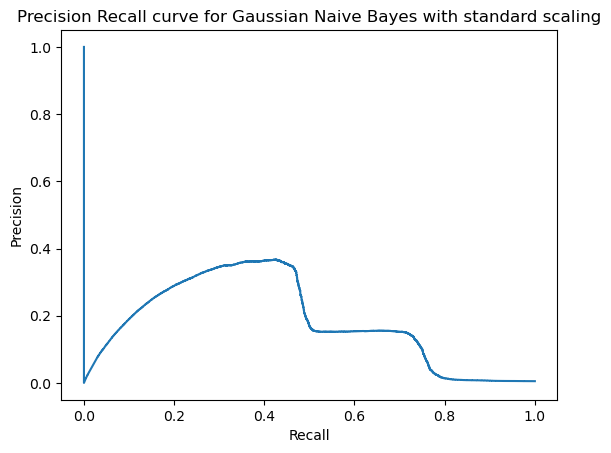

In [198]:
# Calculate precision, recall, and plot the Precision-Recall curve for Gaussian Naive Bayes with standard scaling
y_pred_proba_g_nb_standard = g_nb_standard.predict_proba(X_test_standard)[:,1]
g_nb_standard.predict_proba(X_test_standard).shape
g_nb_standard.predict_proba(X_test_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_g_nb_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Gaussian Naive Bayes with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [199]:
# Calculate and display the Area Under the Curve (AUC) for Gaussian Naive Bayes with standard scaling
print("AUC for Gaussian Naive Bayes with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_g_nb_standard) )

AUC for Gaussian Naive Bayes with standard scaling: 0.848196385563669


Text(0, 0.5, 'TPR')

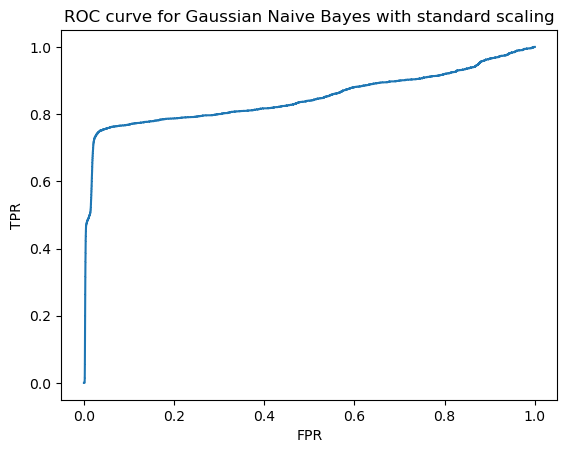

In [200]:
# Plot the ROC curve for Gaussian Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_g_nb_standard)
plt.title('ROC curve for Gaussian Naive Bayes with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [201]:
# Calculate and display the confusion matrix for Gaussian Naive Bayes with min max scaling
confusion_matrix(y_test_min_max,y_test_pred_g_nb_min_max)

array([[541774,  11050],
       [   888,   2007]])

In [202]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for Gaussian Naive Bayes with min max scaling:', precision_score(y_test_min_max,y_test_pred_g_nb_min_max))
print('Recall score for Gaussian Naive Bayes with min max scaling:', recall_score(y_test_min_max,y_test_pred_g_nb_min_max))
print('Accuracy score for Gaussian Naive Bayes with min max scaling:', accuracy_score(y_test_min_max,y_test_pred_g_nb_min_max))
print('F1 score for Gaussian Naive Bayes with min max scaling:', f1_score(y_test_min_max,y_test_pred_g_nb_min_max))

Precision score for Gaussian Naive Bayes with min max scaling: 0.1537106532894233
Recall score for Gaussian Naive Bayes with min max scaling: 0.6932642487046632
Accuracy score for Gaussian Naive Bayes with min max scaling: 0.9785179200279278
F1 score for Gaussian Naive Bayes with min max scaling: 0.251629889669007


In [203]:
ndf_gnb_min_max = [(recall_score(y_test_standard, y_test_pred_g_nb_min_max), precision_score(y_test_standard, y_test_pred_g_nb_min_max), f1_score(y_test_standard, y_test_pred_g_nb_min_max), accuracy_score(y_test_standard, y_test_pred_g_nb_min_max))]
ndf_gnb_min_max_score = pd.DataFrame(data = ndf_gnb_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_gnb_min_max_score.insert(0, 'Model', 'Gaussian Naive Bayes Min Max')
ndf_gnb_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,Gaussian Naive Bayes Min Max,0.693264,0.153711,0.25163,0.978518


Text(0, 0.5, 'Precision')

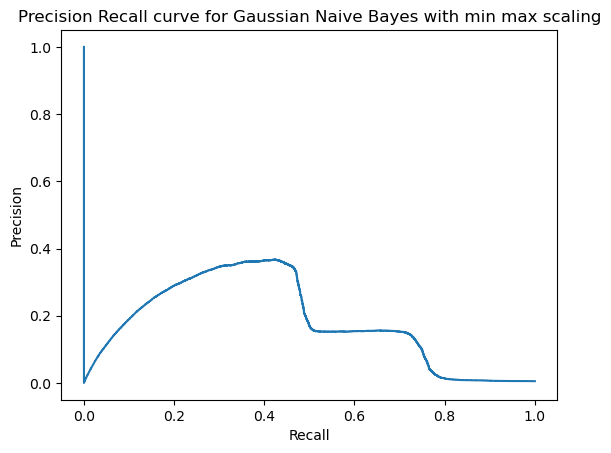

In [204]:
# Calculate precision, recall, and plot the Precision-Recall curve for Gaussian Naive Bayes with min max scaling
y_pred_proba_g_nb_min_max = g_nb_min_max.predict_proba(X_test_min_max)[:,1]
g_nb_min_max.predict_proba(X_test_min_max).shape
g_nb_min_max.predict_proba(X_test_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_g_nb_min_max)
plt.plot(recall, precision)
plt.title('Precision Recall curve for Gaussian Naive Bayes with min max scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [205]:
# Calculate and display the Area Under the Curve (AUC) for Gaussian Naive Bayes with standard scaling
print("AUC for Gaussian Naive Bayes with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_g_nb_min_max)  )

AUC for Gaussian Naive Bayes with min max scaling: 0.8469231888260115


Text(0, 0.5, 'TPR')

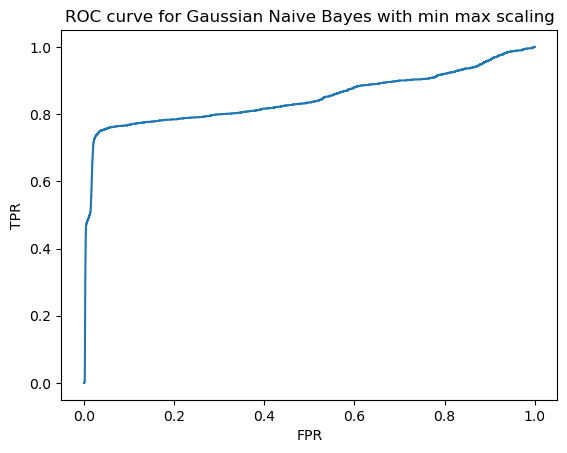

In [206]:
# Plot the ROC curve for Gaussian Naive Bayes with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_g_nb_min_max)
plt.title('ROC curve for Gaussian Naive Bayes with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

### SVM

In [207]:
# Calculate and display the confusion matrix for SVM with standard scaling
confusion_matrix(y_test_standard,y_test_pred_svc_standard)

array([[  5873, 546951],
       [    11,   2884]])

In [208]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for SVM with standard scaling:', precision_score(y_test_standard,y_test_pred_svc_standard))
print('Recall score for SVM with standard scaling:', recall_score(y_test_standard,y_test_pred_svc_standard))
print('Accuracy score for SVM with standard scaling:', accuracy_score(y_test_standard,y_test_pred_svc_standard))
print('F1 score for SVM with standard scaling:', f1_score(y_test_standard,y_test_pred_svc_standard))

Precision score for SVM with standard scaling: 0.0052452099266143476
Recall score for SVM with standard scaling: 0.9962003454231434
Accuracy score for SVM with standard scaling: 0.015757964006989145
F1 score for SVM with standard scaling: 0.010435474824959745


In [209]:
ndf_svm_standard = [(recall_score(y_test_standard, y_test_pred_svc_standard), precision_score(y_test_standard, y_test_pred_svc_standard), f1_score(y_test_standard, y_test_pred_svc_standard), accuracy_score(y_test_standard, y_test_pred_svc_standard))]
ndf_svm_standard_score = pd.DataFrame(data = ndf_svm_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_svm_standard_score.insert(0, 'Model', 'SVM Standard')
ndf_svm_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,SVM Standard,0.9962,0.005245,0.010435,0.015758


In [210]:
# Calculate and display the confusion matrix for SVM with min max scaling
confusion_matrix(y_test_min_max,y_test_pred_svc_min_max)

array([[537511,  15313],
       [   748,   2147]])

In [211]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for SVM with min max scaling:', precision_score(y_test_min_max,y_test_pred_svc_min_max))
print('Recall score for SVM with min max scaling:', recall_score(y_test_min_max,y_test_pred_svc_min_max))
print('Accuracy score for SVM with min max scaling:', accuracy_score(y_test_min_max,y_test_pred_svc_min_max))
print('F1 score for SVM with min max scaling:', f1_score(y_test_min_max,y_test_pred_svc_min_max))

Precision score for SVM with min max scaling: 0.12296678121420389
Recall score for SVM with min max scaling: 0.7416234887737478
Accuracy score for SVM with min max scaling: 0.9710987027616476
F1 score for SVM with min max scaling: 0.21095553917956275


In [212]:
ndf_svm_min_max = [(recall_score(y_test_standard, y_test_pred_svc_min_max), precision_score(y_test_standard, y_test_pred_svc_min_max), f1_score(y_test_standard, y_test_pred_svc_min_max), accuracy_score(y_test_standard, y_test_pred_svc_min_max))]
ndf_svm_min_max_score = pd.DataFrame(data = ndf_svm_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_svm_min_max_score.insert(0, 'Model', 'SVM Min Max')
ndf_svm_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,SVM Min Max,0.741623,0.122967,0.210956,0.971099


### Extension - Unsupervised + Supervised

In [213]:
# Calculate and display the confusion matrix for extended model with standard scaling
confusion_matrix(y_test_standard,y_pred_pca_rfc_standard)

array([[523656,  29168],
       [   730,   2165]])

In [214]:
# Calculate and display precision, recall, accuracy, and F1 scores with standard scaling
print('Precision score for extended model with standard scaling:', precision_score(y_test_standard,y_pred_pca_rfc_standard))
print('Recall score for extended model with standard scaling:', recall_score(y_test_standard,y_pred_pca_rfc_standard))
print('Accuracy score for extended model with standard scaling:', accuracy_score(y_test_standard,y_pred_pca_rfc_standard))
print('F1 score for extended model with standard scaling:', f1_score(y_test_standard,y_pred_pca_rfc_standard))

Precision score for extended model with standard scaling: 0.06909647974978457
Recall score for extended model with standard scaling: 0.7478411053540587
Accuracy score for extended model with standard scaling: 0.9461994281282446
F1 score for extended model with standard scaling: 0.12650461610377467


In [215]:
ndf_pca_rf_standard = [(recall_score(y_test_standard, y_pred_pca_rfc_standard), precision_score(y_test_standard, y_pred_pca_rfc_standard), f1_score(y_test_standard, y_pred_pca_rfc_standard), accuracy_score(y_test_standard, y_pred_pca_rfc_standard))]
ndf_pca_rf_standard_score = pd.DataFrame(data = ndf_pca_rf_standard, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_pca_rf_standard_score.insert(0, 'Model', 'PCA + Random Forest Standard')
ndf_pca_rf_standard_score

,Model,Recall,Precision,F1 Score,Accuracy
0,PCA + Random Forest Standard,0.747841,0.069096,0.126505,0.946199


Text(0, 0.5, 'Precision')

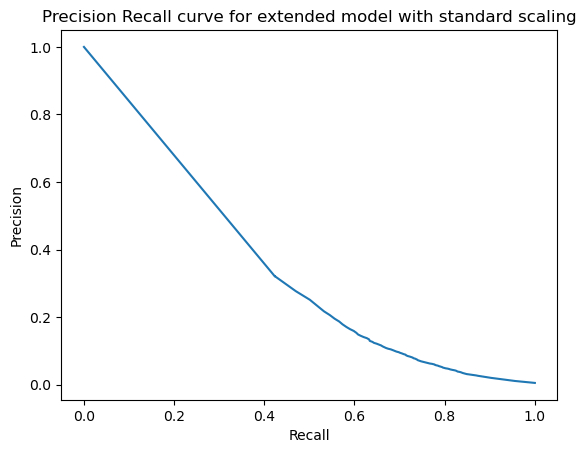

In [216]:
# Calculate precision, recall, and plot the Precision-Recall curve for extended model with standard scaling
y_pred_proba_pca_rfc_standard = pca_rfc_standard.predict_proba(X_test_pca_standard)[:,1]
pca_rfc_standard.predict_proba(X_test_pca_standard).shape
pca_rfc_standard.predict_proba(X_test_pca_standard)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_standard, y_pred_proba_pca_rfc_standard)
plt.plot(recall, precision)
plt.title('Precision Recall curve for extended model with standard scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [217]:
# Calculate and display the Area Under the Curve (AUC) for extended model with standard scaling
print("AUC for extended model with standard scaling:", roc_auc_score(y_test_standard, y_pred_proba_pca_rfc_standard) )

AUC for extended model with standard scaling: 0.925808277871207


Text(0, 0.5, 'TPR')

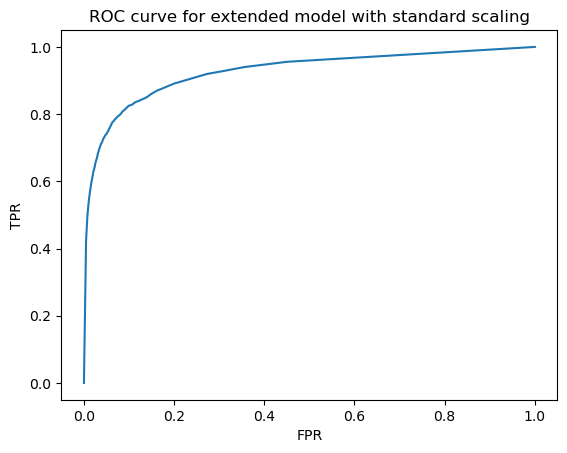

In [218]:
# Plot the ROC curve for extended model with standard scaling
FPR, TPR, threshold = roc_curve(y_test_standard, y_pred_proba_pca_rfc_standard)
plt.title('ROC curve for extended model with standard scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [219]:
# Calculate and display the confusion matrix for extended model with min max scaling
confusion_matrix(y_test_min_max,y_pred_pca_rfc_min_max)

array([[491922,  60902],
       [  1021,   1874]])

In [220]:
# Calculate and display precision, recall, accuracy, and F1 scores with min max scaling
print('Precision score for extended model with min max scaling:', precision_score(y_test_min_max,y_pred_pca_rfc_min_max))
print('Recall score for extended model with min max scaling:', recall_score(y_test_min_max,y_pred_pca_rfc_min_max))
print('Accuracy score for extended model with min max scaling:', accuracy_score(y_test_min_max,y_pred_pca_rfc_min_max))
print('F1 score for extended model with min max scaling:', f1_score(y_test_min_max,y_pred_pca_rfc_min_max))

Precision score for extended model with min max scaling: 0.02985217280489359
Recall score for extended model with min max scaling: 0.6473229706390328
Accuracy score for extended model with min max scaling: 0.8885713822993275
F1 score for extended model with min max scaling: 0.057072375934582996


In [221]:
ndf_pca_rf_min_max = [(recall_score(y_test_standard, y_pred_pca_rfc_min_max), precision_score(y_test_standard, y_pred_pca_rfc_min_max), f1_score(y_test_standard, y_pred_pca_rfc_min_max), accuracy_score(y_test_standard, y_pred_pca_rfc_min_max))]
ndf_pca_rf_min_max_score = pd.DataFrame(data = ndf_pca_rf_min_max, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ndf_pca_rf_min_max_score.insert(0, 'Model', 'PCA + Random Forest Min Max')
ndf_pca_rf_min_max_score

,Model,Recall,Precision,F1 Score,Accuracy
0,PCA + Random Forest Min Max,0.647323,0.029852,0.057072,0.888571


Text(0, 0.5, 'Precision')

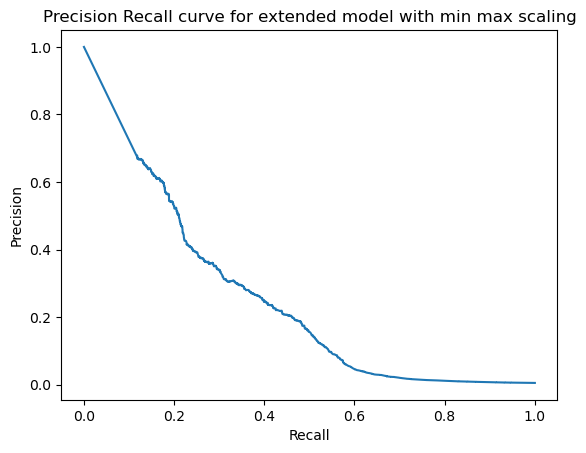

In [222]:
# Calculate precision, recall, and plot the Precision-Recall curve for extended model with min max scaling
y_pred_proba_pca_rfc_min_max = pca_rfc_min_max.predict_proba(X_test_pca_min_max)[:,1]
pca_rfc_min_max.predict_proba(X_test_pca_min_max).shape
pca_rfc_min_max.predict_proba(X_test_pca_min_max)[ : , 1 ]

precision, recall, threshold = precision_recall_curve(y_test_min_max, y_pred_proba_pca_rfc_min_max)
plt.plot(recall, precision)
plt.title('Precision Recall curve for extended model with min max scaling')
plt.xlabel("Recall")
plt.ylabel("Precision")

In [223]:
# Calculate and display the Area Under the Curve (AUC) for extended model with standard scaling
print("AUC for extended model with min max scaling:", roc_auc_score(y_test_min_max, y_pred_proba_pca_rfc_min_max)  )

AUC for extended model with min max scaling: 0.8260208204133316


Text(0, 0.5, 'TPR')

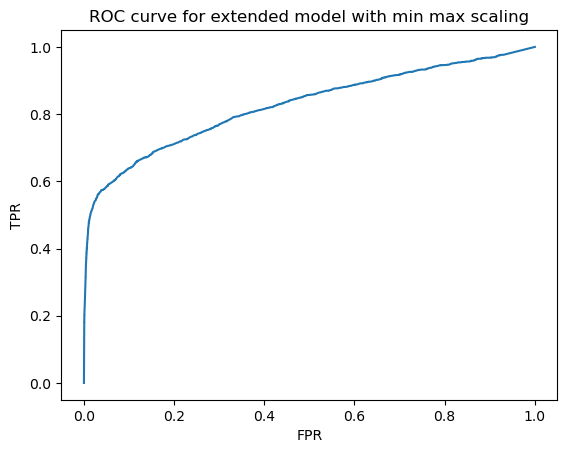

In [224]:
# Plot the ROC curve for extended model with standard scaling
FPR, TPR, threshold = roc_curve(y_test_min_max, y_pred_proba_pca_rfc_min_max)
plt.title('ROC curve for extended model with min max scaling')
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [242]:
predictions = pd.concat([ndf_lr_standard_score, ndf_lr_min_max_score, ndf_knn_standard_score, ndf_knn_min_max_score, ndf_dt_standard_score, ndf_dt_min_max_score, ndf_rf_standard_score, ndf_rf_min_max_score, ndf_nb_standard_score, ndf_nb_min_max_score, ndf_gnb_standard_score, ndf_gnb_min_max_score, ndf_svm_standard_score, ndf_svm_min_max_score, ndf_pca_rf_standard_score, ndf_pca_rf_min_max_score], ignore_index=True, sort=False)
predictions.sort_values(by=['F1 Score'], ascending=False)
#predictions

,Model,Recall,Precision,F1 Score,Accuracy
11,Gaussian Naive Bayes Min Max,0.693264,0.153711,0.251630,0.978518
10,Gaussian Naive Bayes Standard,0.685665,0.153912,0.251393,0.978727
13,SVM Min Max,0.741623,0.122967,0.210956,0.971099
8,Naive Bayes Standard,0.759585,0.119433,0.206411,0.969573
5,Decision Tree Min Max,0.758204,0.114382,0.198777,0.968158
1,Logistic Regression Min Max,0.761313,0.083013,0.149703,0.954947
2,KNN Standard,0.662867,0.084167,0.149368,0.960669
6,Random Forest Standard,0.532988,0.085225,0.146952,0.967764
0,Logistic Regression Standard,0.761313,0.079127,0.143354,0.952600
3,KNN Min Max,0.756822,0.071220,0.130188,0.947317
